# setup

This notebook requires:
* neteworkx
* pygraphviz

If you can't install pygraphviz on MacOS X where graphviz is installed by brew, you may download the wheel as:

    pip3 download --dest . --no-cache pygraphviz
    unzip pygraphvizxxx.zip
    cd pygraphvizxxx

Open file `setup.py` and locate `include_dirs` and `library_dirs`. Then add 
`"/usr/local/Cellar/graphviz/8.1.0/include"` and `"/usr/local/Cellar/graphviz/8.1.0/lib"`
to the bracket. It looks like as follows:

    extension = [
        Extension(
            "pygraphviz._graphviz",
            ["pygraphviz/graphviz_wrap.c"],
            include_dirs=["/usr/local/Cellar/graphviz/8.1.0/include"],
            library_dirs=["/usr/local/Cellar/graphviz/8.1.0/lib"],
            # cdt does not link to cgraph, whereas cgraph links to cdt.
            # thus, cdt needs to come first in the library list to be sure
            # that both libraries are linked in the final built .so (if cgraph
            # is first, the implicit inclusion of cdt can lead to an incomplete
            # link list, having only cdt and preventing the module from being loaded with
            # undefined symbol errors. seen under PyPy on Linux.)
            libraries=["cdt", "cgraph", "gvc"],
            define_macros=define_macros,
        )
    ]

Then run:

    python3 setup.py install

It should compile and install the `pygraphviz` package for you.

In [ ]:
!pip install networkx

In [1]:
import networkx as nx
import pygraphviz

In [9]:
# Create a directed graph
g = nx.DiGraph()
# Add an edge to the directed graph from X to Y
g.add_edge('X', 'Y')
# Print some statistics about the graph
print(g)
# Get the nodes and edges from the graph
print("Nodes:", g.nodes())
print("Edges:", g.edges())
# Get node properties
print("X props:", g.nodes['X'])
print("Y props:", g.nodes['Y'])
# Get edge properties
print("X=>Y props:", g['X']['Y'])

DiGraph with 2 nodes and 1 edges
Nodes: ['X', 'Y']
Edges: [('X', 'Y')]
X props: {}
Y props: {}
X=>Y props: {}


In [11]:
# Update a node property
g.nodes['X'].update({'prop1' : 'value1'})
print("X props:", g.nodes['X'])
# Update an edge property
g['X']['Y'].update({'label' : 'label1'})
print("X=>Y props:", g['X']['Y'])

X props: {'prop1': 'value1'}
X=>Y props: {'label': 'label1'}


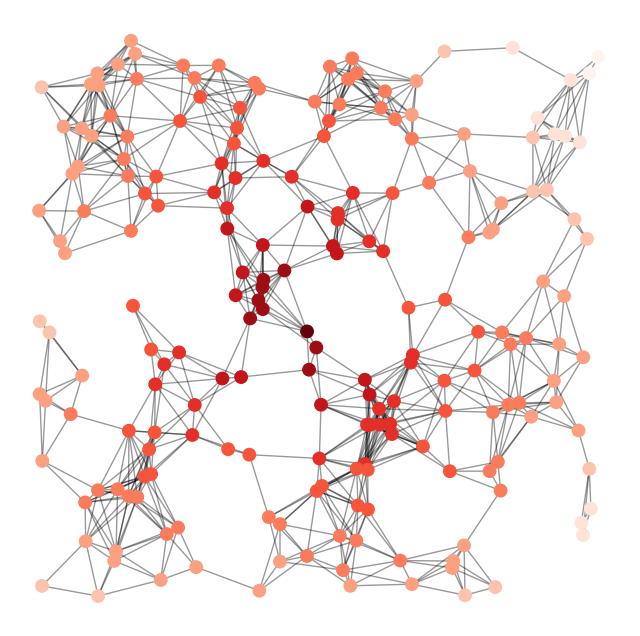

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

# Use seed when creating the graph for reproducibility
G = nx.random_geometric_graph(200, 0.125, seed=896803)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

Graph named 'G208' with 809 nodes and 1112 edges
142 connected components


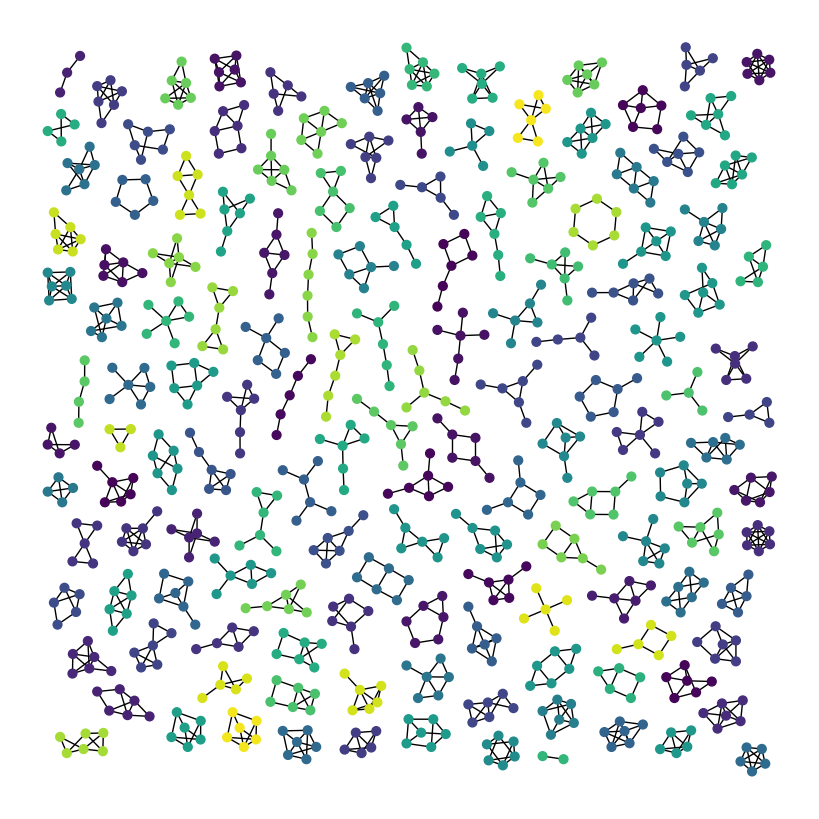

In [2]:
import random

import matplotlib.pyplot as plt
import networkx as nx


GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher


def atlas6():
    """Return the atlas of all connected graphs with at most 6 nodes"""

    Atlas = nx.graph_atlas_g()[3:209]  # 0, 1, 2 => no edges. 208 is last 6 node graph
    U = nx.Graph()  # graph for union of all graphs in atlas
    for G in Atlas:
        # check if connected
        if nx.number_connected_components(G) == 1:
            # check if isomorphic to a previous graph
            if not GraphMatcher(U, G).subgraph_is_isomorphic():
                U = nx.disjoint_union(U, G)
    return U


G = atlas6()

print(G)
print(nx.number_connected_components(G), "connected components")

plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = (G.subgraph(c) for c in nx.connected_components(G))
for g in C:
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.show()

The route of the traveller is: [0, 11, 5, 7, 12, 18, 19, 17, 14, 8, 4, 16, 3, 10, 15, 6, 9, 2, 1, 13, 0]


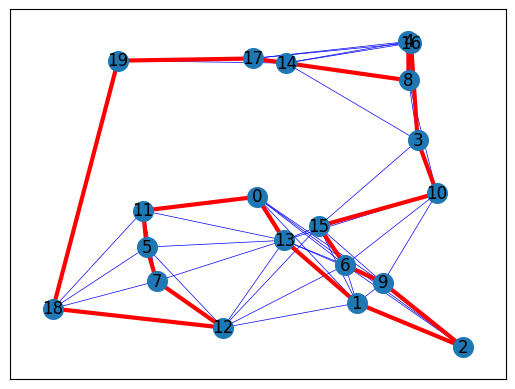

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math

G = nx.random_geometric_graph(20, radius=0.4, seed=15)
pos = nx.get_node_attributes(G, "pos")

# Depot should be at (0,0)
pos[0] = (0.5, 0.5)

H = G.copy()


# Calculating the distances between the nodes as edge's weight.
for i in range(len(pos)):
    for j in range(i + 1, len(pos)):
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1])
        dist = dist
        G.add_edge(i, j, weight=dist)

cycle = nx_app.christofides(G, weight="weight")
edge_list = list(nx.utils.pairwise(cycle))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

print("The route of the traveller is:", cycle)
plt.show()

In [21]:
kkg = nx.generators.small.krackhardt_kite_graph()


/var/folders/xn/t_nj5y1n4lv75t_v154rv5_h0000gn/T/ipykernel_38968/195821691.py:46: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=2.0, edge_color=edge_colors)


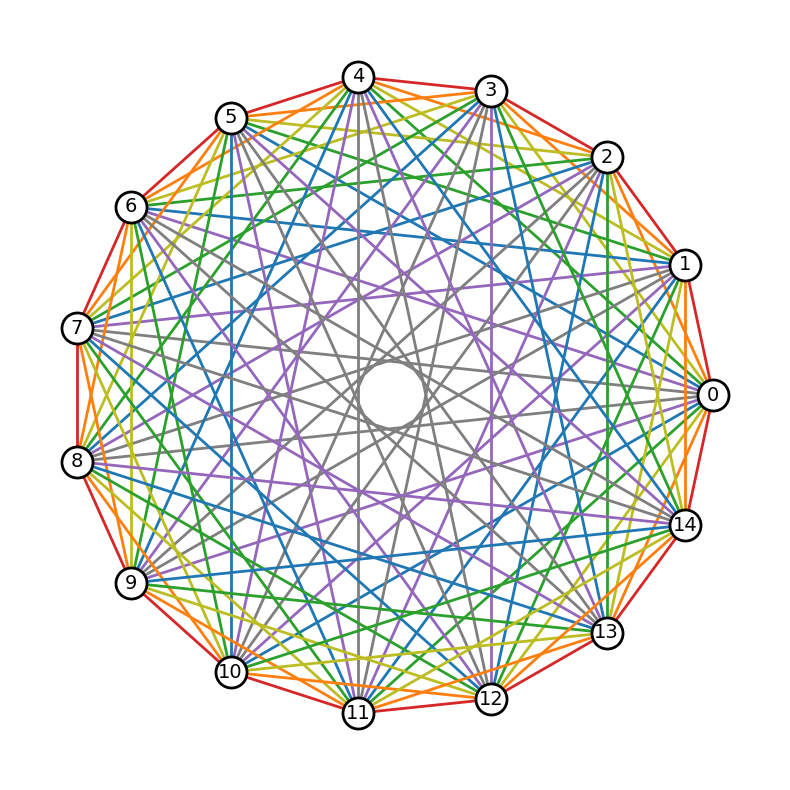

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# A rainbow color mapping using matplotlib's tableau colors
node_dist_to_color = {
    1: "tab:red",
    2: "tab:orange",
    3: "tab:olive",
    4: "tab:green",
    5: "tab:blue",
    6: "tab:purple",
    7: "tab:gray",
}

# Create a complete graph with an odd number of nodes
nnodes = 15
G = nx.complete_graph(nnodes)

# A graph with (2n + 1) nodes requires n colors for the edges
n = (nnodes - 1) // 2
ndist_iter = list(range(1, n + 1))

# Take advantage of circular symmetry in determining node distances
ndist_iter += ndist_iter[::-1]


def cycle(nlist, n):
    return nlist[-n:] + nlist[:-n]


# Rotate nodes around the circle and assign colors for each edge based on
# node distance
nodes = list(G.nodes())
for i, nd in enumerate(ndist_iter):
    for u, v in zip(nodes, cycle(nodes, i + 1)):
        G[u][v]["color"] = node_dist_to_color[nd]

pos = nx.circular_layout(G)
# Create a figure with 1:1 aspect ratio to preserve the circle.
fig, ax = plt.subplots(figsize=(8, 8))
node_opts = {"node_size": 500, "node_color": "w", "edgecolors": "k", "linewidths": 2.0}
nx.draw_networkx_nodes(G, pos, **node_opts)
nx.draw_networkx_labels(G, pos, font_size=14)
# Extract color from edge data
edge_colors = [edgedata["color"] for _, _, edgedata in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=2.0, edge_color=edge_colors)

ax.set_axis_off()
fig.tight_layout()
plt.show()